<a href="https://colab.research.google.com/github/CHIKU1799/NeoCard_Clustering-Problem/blob/main/Copy_of_NeoCard_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

#**Problem Statement:**

# Kalash, the dynamic CMO of NeoCard, sat in his glass-walled office, sipping his espresso. He had a vision—NeoCard was already a dominant player in the credit card industry, but he wanted to take it a step further. He envisioned offering Forex benefits to the most valuable customers, giving them exclusive advantages on international transactions. But the challenge was whom to target.

# To crack this, he called in his top data scientist team and asked them to segment their customers based on credit card spending behavior. The team, armed with data science, got to work.



# Chapter #1: Gathering the Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os

# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv("/content/SmartCard_Data.csv")

# CUSTID: Identification of Credit Card holder
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

creditcard_df
creditcard_df.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Chapter 2: Cleaning the Treasure – Preparing the Data

Like any treasure hunter, Kalash knew that raw data needed polishing before it could reveal its true value. He noticed some missing values in

*   "Minimum Payments"
*   "Credit Limit"



<Axes: >

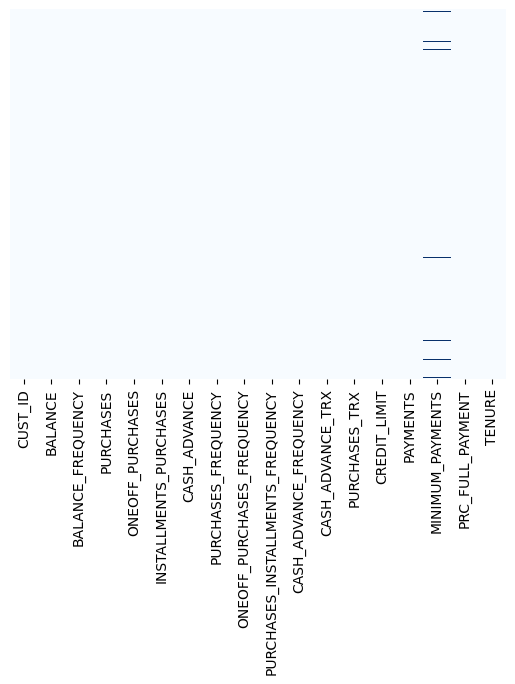

In [ ]:
creditcard_df.isnull().sum()

sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


With Python code, the team filled these gaps with their respective averages.

<Axes: >

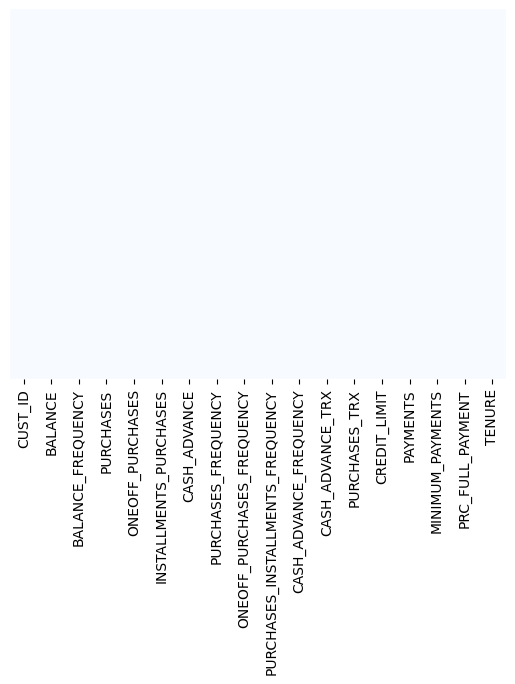

In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

They also removed unnecessary baggage like: "CUST_ID

In [ ]:
# Let's drop Customer ID since it has no meaning here
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# Appendix: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

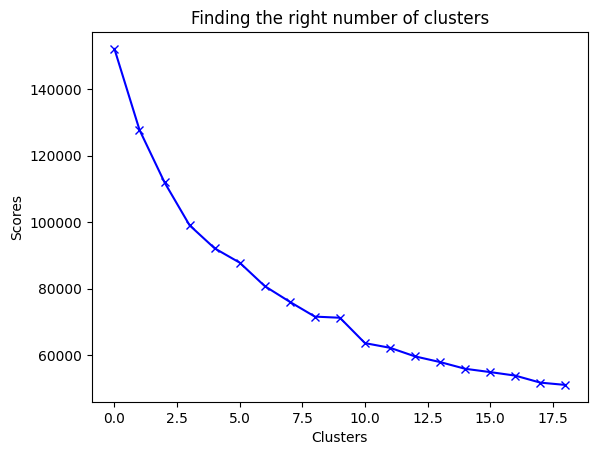

In [ ]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7.

# Chapter 3: The 8 Kingdoms – Understanding Customer Segments
##  APPLY K-MEANS METHOD

In [ ]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_
kmeans.cluster_centers_.shape
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.621291,0.374104,-0.218696,-0.153899,-0.234432,2.003659,-0.467506,-0.205758,-0.414279,1.941505,1.902993,-0.269012,0.992216,0.782861,0.367615,-0.388936,-0.099225
1,-0.697720,-2.131056,-0.318368,-0.236777,-0.317674,-0.307075,-0.567512,-0.434822,-0.461795,-0.486675,-0.359992,-0.428548,-0.216873,-0.222797,-0.255688,0.247775,-0.153588
2,-0.144237,0.384306,0.418992,0.554644,-0.028387,-0.330013,0.914636,1.814043,0.087091,-0.391422,-0.316338,0.495554,0.358254,0.063286,-0.158226,0.352206,0.178035
3,1.180370,0.465753,-0.056179,-0.284877,0.389819,-0.031301,0.036912,-0.555727,0.276551,-0.251168,-0.083087,0.148826,-0.069372,-0.136715,10.521058,-0.525551,0.292749
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
5,0.837526,0.467397,2.267182,1.784145,2.083005,-0.195271,1.164710,1.628766,1.210529,-0.310831,-0.214061,2.737484,1.228926,1.288551,0.265526,0.327558,0.333131
6,-0.398356,0.308937,-0.061013,-0.255349,0.324810,-0.360281,0.979152,-0.410579,1.174977,-0.461930,-0.357815,0.139076,-0.315782,-0.241164,-0.120293,0.362922,-0.022062
7,-0.000356,0.371388,-0.366237,-0.250016,-0.406554,-0.059952,-0.886050,-0.418014,-0.773736,0.168251,-0.004892,-0.494692,-0.334375,-0.263870,-0.057456,-0.455287,-0.012812


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4939.055183,0.965892,535.957989,336.996497,199.073834,5180.637592,0.302718,0.141076,0.199792,0.523659,16.235359,8.023204,8104.535409,3999.450189,1720.918697,3.995761e-02,11.384530
1,112.230334,0.372443,323.006005,199.435281,123.799207,334.921204,0.262580,0.072742,0.180908,0.037756,0.792148,4.057737,3705.376362,1088.169654,268.337149,2.261847e-01,11.311778
2,1264.257807,0.968309,1898.388636,1513.033388,385.397273,286.818128,0.857438,0.743622,0.399050,0.056817,1.090051,27.027444,5797.923749,1916.351567,495.466660,2.567289e-01,11.755575
3,4021.314923,0.987603,883.176591,119.600227,763.576364,913.231699,0.505165,0.036674,0.474346,0.084883,2.681818,18.409091,4242.045455,1337.367541,25383.088762,-8.326673e-17,11.909091
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,4.784091e-01,11.933333
5,3307.714672,0.987993,5847.073479,3553.752696,2294.703272,569.378633,0.957805,0.688350,0.845533,0.072944,1.788018,82.753456,8965.783410,5463.372557,1483.003999,2.495199e-01,11.963134
6,735.329759,0.950455,872.849811,168.610263,704.789194,223.345735,0.883332,0.079974,0.831403,0.042707,0.807001,18.166743,3345.503631,1034.997507,583.869191,2.598630e-01,11.487794
7,1563.733803,0.965249,220.734774,177.462616,43.425857,853.149053,0.134736,0.077756,0.056935,0.168813,3.215443,2.413650,3277.858210,969.266741,730.307347,2.055090e-02,11.500172


In [ ]:
labels.shape # Labels associated to each data point

(8950,)

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


array([2, 6, 1, ..., 0, 2, 2], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


# CHAPTER 4: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [ ]:
# Obtain the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,7
1,-1.138295,2.506477,0
2,0.969684,-0.383520,2
3,-0.873628,0.043166,7
4,-1.599434,-0.688581,7


Kalash wanted to see these eight groups clearly. Using a technique called PCA (Principal Component Analysis), he reduced the data into two dimensions and created a colorful scatterplot.
<br><br>The plot showed **eight** distinct clusters, each representing one of the customer groups. It was like looking at a map of his customer base—each cluster a different land with its own unique characteristics!

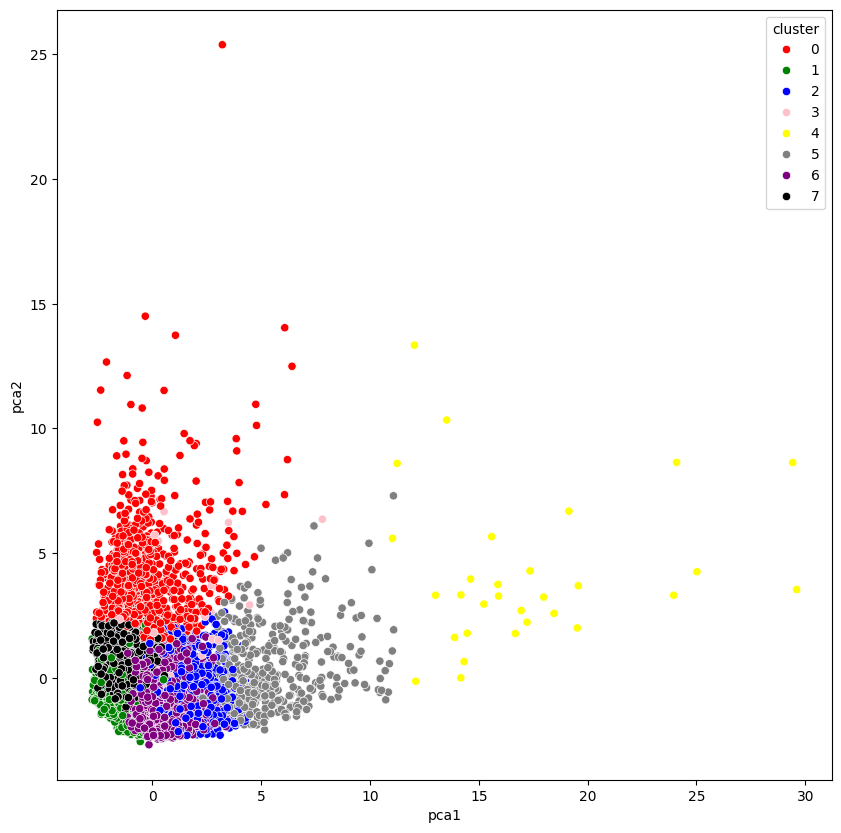

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# What would be Kalash Plan?


Focus on VIP Customers (Group 5):

    These high-spending, loyal customers deserve exclusive perks like premium rewards programs or concierge services.
    Kamlesh decided to keep them happy by offering personalized benefits.

Engage the Big Borrowers (Group 0):

    These customers generate a lot of revenue through interest charges but pose some risk due to high balances.
    Kamlesh planned to offer them financial education and balance transfer schemes to help manage their debt while encouraging more spending.

Support the Balanced Spenders (Group 6):

    Stable and consistent users like these are perfect candidates for higher credit limits or tailored financial products.
    Kamlesh wanted to reward their reliability with special offers.

Reignite Inactive Customers (Group 7):

    Dormant users need reactivation campaigns with exciting incentives like cashback offers or discounts on first purchases.
    Kamlesh decided to send targeted emails and app notifications to bring them back into action.

Encourage Installment Lovers (Group 4):

    Since these customers love paying in installments, Kamlesh planned to introduce flexible installment plans for big-ticket items.
    He also considered offering lower interest rates on EMIs for this group.

Reward Frequent Shoppers (Group 3):

    These disciplined shoppers would benefit from enhanced reward points on shopping or exclusive discounts at partner stores.
    Kamlesh wanted to strengthen their loyalty by making shopping even more rewarding.

Motivate Cautious Borrowers (Group 2):

    These careful spenders could be encouraged to shop more by introducing low-interest rates or cashback offers on everyday purchases.
    Kamlesh also thought about promoting educational content around smart credit card usage.

Reactivate Minimal Users (Group 1):

    Minimal users need a reason to use their cards more often. Kamlesh decided to offer small rewards like movie tickets or dining discounts for regular usage.





# AutoEncoders-ANN in picture

## Chapter 1: Enhancing Kalash's Story with Advanced AI:

Now, Kalash was thrilled with the success of his customer segmentation using K-Means clustering. But as a visionary CMO, he wasn’t one to rest on his laurels. He wondered, “How can we make this even better? How can we uncover deeper patterns and improve the accuracy of our customer insights?” That’s when his team introduced him to the world of Artificial Neural Networks (ANNs) and specifically, the magic of Autoencoders. Kamlesh’s journey into advanced AI had just begun.<br>

<br> **K-means** had certain limitations:


*   
    **Fixed Assumptions:** K-Means assumes clusters are spherical and evenly distributed, which may not reflect real-world customer behavior.

*  **High Dimensionality Challenge:**  The dataset had 17 features, and reducing dimensions manually using PCA might not capture all the nuances.

*   **Complex Patterns:** K-Means struggles to capture non-linear relationships between features.<br> <br>


Kalash needed a more sophisticated model—one that could automatically learn the most important features from the data and handle complex relationships. That’s where Autoencoders came in.



Autoencoders are a type of neural network designed to learn efficient data representations in an unsupervised manner. Here's a simple explanation of how they work:

    Structure: An autoencoder consists of three main parts:
        Encoder: Compresses the input data into a lower-dimensional representation
        Bottleneck: The compressed representation of the data
        Decoder: Reconstructs the original input from the compressed representation
    Process:
        The encoder takes the input data and compresses it
        The compressed data passes through the bottleneck
        The decoder attempts to reconstruct the original input from the compressed data
    Training:
        The autoencoder is trained to minimize the difference between the original input and the reconstructed output
        This forces the network to learn the most important features of the data
    Applications:
        Dimensionality reduction
        Feature learning
        Noise reduction in data
        Anomaly detection


In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 10

input_df = Input(shape=(17,))

# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

# Give the encoded layer a name
encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform', name='encoded_layer')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

# Now you can access the encoded layer by name
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoded_layer').output)

In [ ]:
creditcard_df_scaled.shape
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)


Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.7202
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.2928
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.2106
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.1706
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.1323
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.1062
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.1009
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0936
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0847
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0792
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0826
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0759
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0759
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0740
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0676
Epoc

In [ ]:
autoencoder.save_weights('autoencoder.weights.h5')
pred = encoder.predict(creditcard_df_scaled)
pred.shape

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(8950, 10)

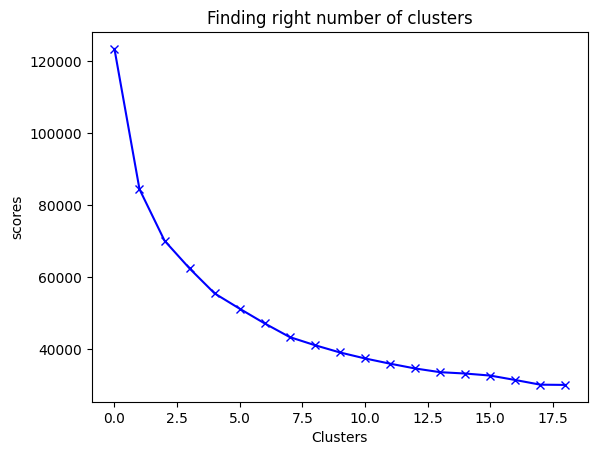

<ipython-input-25-293677aac81d>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
<ipython-input-25-293677aac81d>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


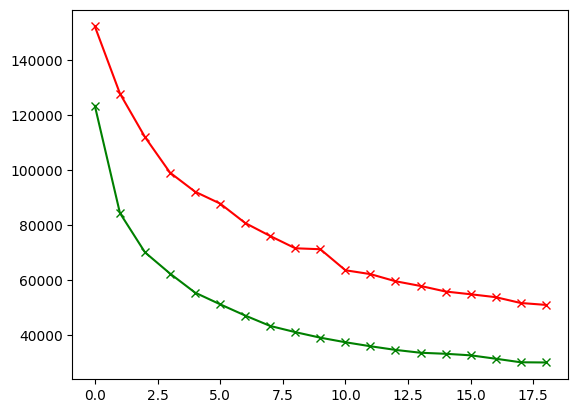

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')


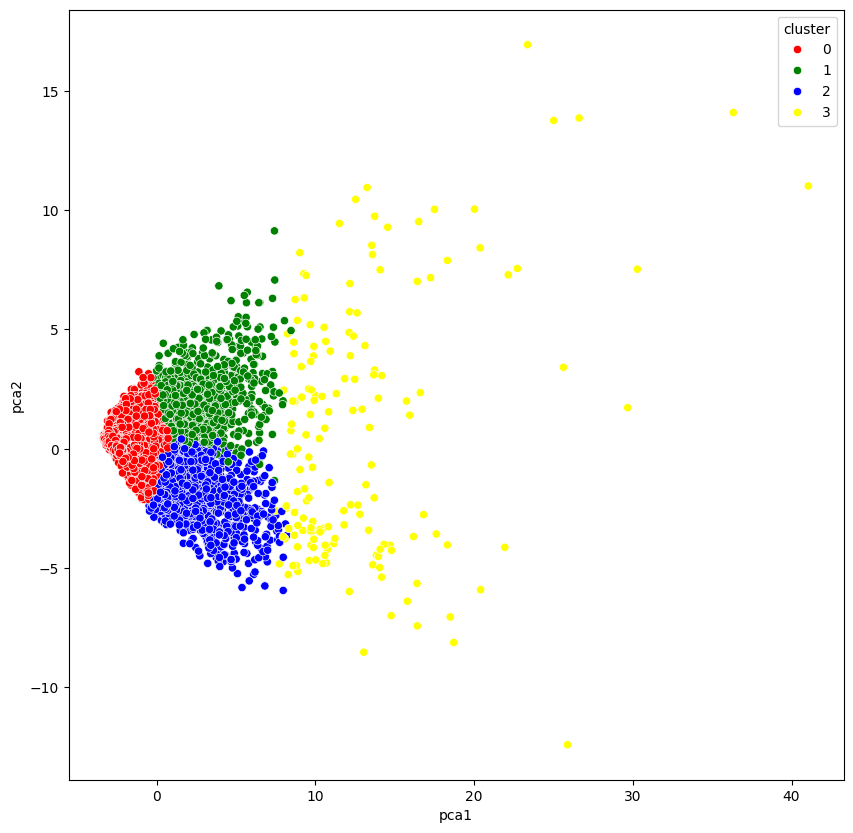

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

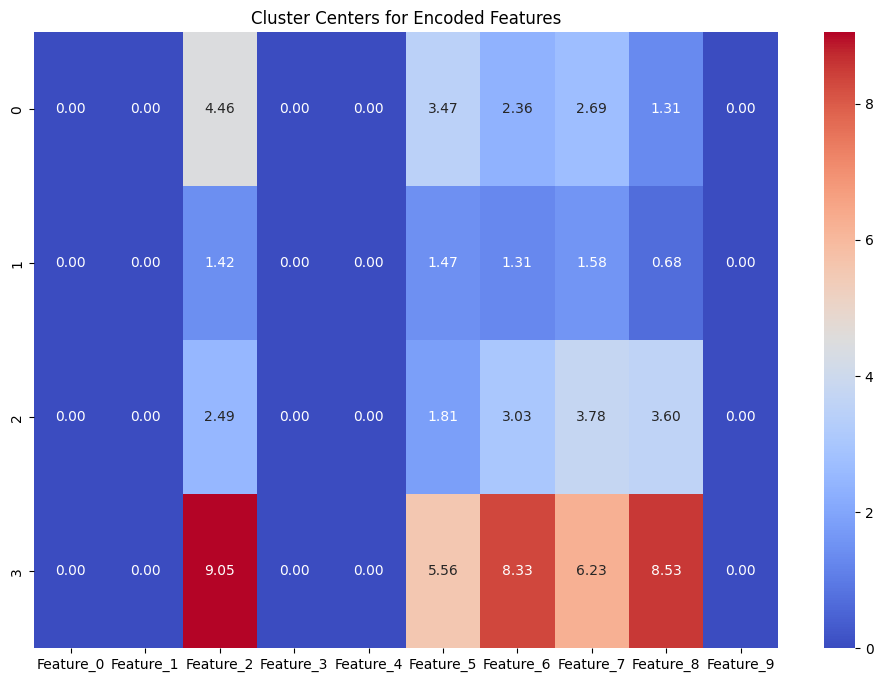

         Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
Cluster                                                                     
0              0.0        0.0   4.456869        0.0        0.0   3.463177   
1              0.0        0.0   1.421712        0.0        0.0   1.465009   
2              0.0        0.0   2.492075        0.0        0.0   1.814592   
3              0.0        0.0   9.050835        0.0        0.0   5.555755   

         Feature_6  Feature_7  Feature_8  Feature_9  
Cluster                                              
0         2.360106   2.688364   1.306688        0.0  
1         1.305460   1.581516   0.683740        0.0  
2         3.027121   3.779965   3.600295        0.0  
3         8.332818   6.232739   8.526484        0.0  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pred' contains the 10 encoded features from the Autoencoder
encoded_features = pd.DataFrame(pred, columns=[f'Feature_{i}' for i in range(10)])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
encoded_features['Cluster'] = kmeans.fit_predict(encoded_features)

# Calculate cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=encoded_features.columns[:-1])

# Visualize cluster centers
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Centers for Encoded Features')
plt.show()

# Analyze cluster characteristics
cluster_summary = encoded_features.groupby('Cluster').mean()
print(cluster_summary)


# Conclusion:


<style>
  .mega-table {
    font-size: 28px;
    width: 100%;
    border-collapse: separate;
    border-spacing: 0;
    margin-top: 30px;
    font-family: Arial, sans-serif;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
  }
  .mega-table th, .mega-table td {
    border: 3px solid #ddd;
    padding: 20px;
    text-align: left;
  }
  .mega-table th {
    background-color: #4CAF50;
    color: white;
    font-weight: bold;
    text-transform: uppercase;
  }
  .mega-table tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  .mega-table tr:hover {
    background-color: #e6e6e6;
  }
  .cluster-name {
    font-weight: bold;
    color: #2c3e50;
  }
  .feature-value {
    color: #34495e;
  }
</style>

<table class="mega-table">
  <tr>
    <th>Cluster</th>
    <th>Name</th>
    <th>Major Feature Values</th>
  </tr>
  <tr>
    <td>0</td>
    <td class="cluster-name">Cluster 0</td>
    <td>
      <div class="feature-value">High purchase frequency: 2.61</div>
      <div class="feature-value">High cash advance usage: 2.80</div>
      <div class="feature-value">Moderate credit limit: 2.33</div>
      <div class="feature-value">Moderate Balance: 1.67</div>
    </td>
  </tr>
  <tr>
    <td>1</td>
    <td class="cluster-name">Cluster 1</td>
    <td>
      <div class="feature-value">Moderate balance: 1.84</div>
      <div class="feature-value">High installment purchases frequency: 2.20</div>
      <div class="feature-value">High percentage of full payment: 2.49</div>
      <div class="feature-value">Low purchases: 1.22</div>
    </td>
  </tr>
  <tr>
    <td>2</td>
    <td class="cluster-name">Cluster 2</td>
    <td>
      <div class="feature-value">Very high balance: 7.18</div>
      <div class="feature-value">Very high purchases: 6.46</div>
      <div class="feature-value">High credit limit: 5.73</div>
      <div class="feature-value">High payments: 4.30</div>
    </td>
  </tr>
  <tr>
    <td>3</td>
    <td class="cluster-name">Cluster 3</td>
    <td>
      <div class="feature-value">All features < 1.0</div>
      <div class="feature-value">Highest being credit limit: 1.18</div>
    </td>
  </tr>
</table>


What according to you are the 2 important clusters?
<br> Why So?
<br> Possible solutions to tackle each cluster?